In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import classification_report , confusion_matrix , recall_score , ConfusionMatrixDisplay , accuracy_score , ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [60]:
df = pd.read_csv('Fraud_sample.csv')

In [61]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,276,CASH_OUT,137518.29,C886353791,0.0,0.00,C870406149,292767.77,430286.06,0,0
1,139,CASH_OUT,275908.20,C1445445558,0.0,0.00,C2123871897,14266212.98,14542121.17,0,0
2,323,CASH_OUT,330057.62,C2075970401,22710.0,0.00,C1648009238,24666.95,354724.57,0,0
3,134,TRANSFER,271099.46,C1797411942,0.0,0.00,C38146829,1434097.90,1705197.36,0,0
4,163,CASH_OUT,37912.46,C188487550,30451.0,0.00,C1144793327,1274494.01,1312406.47,0,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,596,PAYMENT,4402.65,C850384550,6469.0,2066.35,M360902984,0.00,0.00,0,0
999996,137,TRANSFER,485333.16,C1789460107,0.0,0.00,C2132993501,761528.11,1246861.27,0,0
999997,159,CASH_IN,51551.74,C774162094,1771495.8,1823047.54,C443365105,112419.15,60867.42,0,0
999998,352,CASH_OUT,127316.72,C72281736,2980.0,0.00,C1532719825,1409549.17,1536865.89,0,0


In [62]:
df.duplicated().sum()

0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000000 non-null  int64  
 1   type            1000000 non-null  object 
 2   amount          1000000 non-null  float64
 3   nameOrig        1000000 non-null  object 
 4   oldbalanceOrg   1000000 non-null  float64
 5   newbalanceOrig  1000000 non-null  float64
 6   nameDest        1000000 non-null  object 
 7   oldbalanceDest  1000000 non-null  float64
 8   newbalanceDest  1000000 non-null  float64
 9   isFraud         1000000 non-null  int64  
 10  isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 83.9+ MB


In [64]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [65]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,276,CASH_OUT,137518.29,C886353791,0.00,0.00,C870406149,292767.77,430286.06,0,0
1,139,CASH_OUT,275908.20,C1445445558,0.00,0.00,C2123871897,14266212.98,14542121.17,0,0
2,323,CASH_OUT,330057.62,C2075970401,22710.00,0.00,C1648009238,24666.95,354724.57,0,0
3,134,TRANSFER,271099.46,C1797411942,0.00,0.00,C38146829,1434097.90,1705197.36,0,0
4,163,CASH_OUT,37912.46,C188487550,30451.00,0.00,C1144793327,1274494.01,1312406.47,0,0
5,160,TRANSFER,493628.32,C1113461534,0.00,0.00,C1003594493,596233.74,1089862.06,0,0
6,39,TRANSFER,149537.58,C1775342020,0.00,0.00,C2145307120,203228.58,352766.15,0,0
7,19,PAYMENT,6068.62,C964045729,0.00,0.00,M904737602,0.00,0.00,0,0
8,189,CASH_OUT,484312.24,C670764474,126726.22,0.00,C701250368,2878707.68,3363019.92,0,0
9,158,CASH_OUT,427819.42,C234108239,104048.00,0.00,C606352793,1367904.08,1795723.50,0,0


In [66]:
df = pd.concat([df[df['isFraud']==1].sample(n=50),df[df['isFraud']==0].sample(n=950)])

In [67]:
df.reset_index(inplace=True)

In [68]:
df.drop('index',axis = 1,inplace = True )

In [69]:
df['isFraud'].value_counts()

0    950
1     50
Name: isFraud, dtype: int64

In [70]:
df.drop(['step','nameOrig','nameDest'],axis = 1 , inplace = True)

In [71]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [72]:
df.duplicated().sum()

0

In [73]:
df.corr()['isFraud'].abs().sort_values(ascending = False)

isFraud           1.000000
amount            0.318890
newbalanceOrig    0.058020
oldbalanceDest    0.035243
oldbalanceOrg     0.027288
newbalanceDest    0.015686
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [74]:
x = df.drop('isFraud' ,axis = 1 )
y = df['isFraud']

In [75]:
x = pd.get_dummies(x , drop_first = True)

In [76]:
expln_variance = []
for i in range(1,10):
    pca = PCA(n_components = i)
    pca.fit(x)
    expln_variance.append(sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Explained variance')

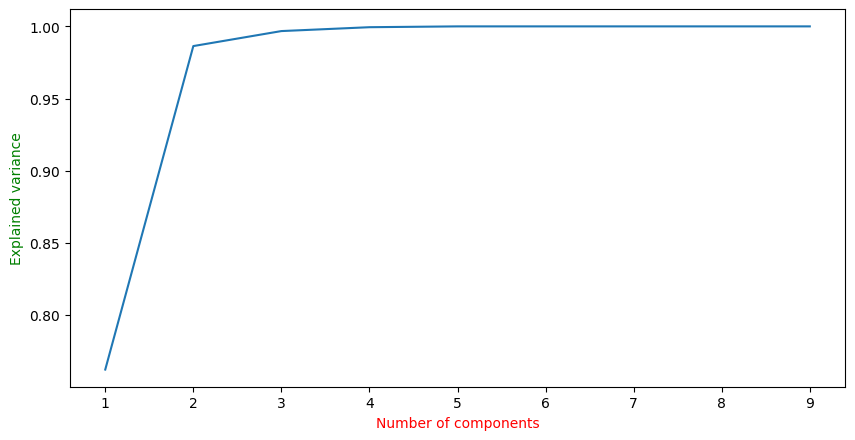

In [77]:
plt.figure(figsize = (10,5) , dpi= 100)
plt.plot(range(1,10) , expln_variance)
plt.xlabel('Number of components' , color = 'red')
plt.ylabel('Explained variance' , color = 'green')

In [78]:
pca_x = PCA(n_components = 4).fit_transform(x)

In [79]:
oversample = SMOTE(k_neighbors=3 , random_state = 101)  
x, y = oversample.fit_resample(pca_x, y)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [81]:
scaler = StandardScaler()

In [82]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [83]:
y.value_counts()

0    950
1    950
Name: isFraud, dtype: int64

# KNN

In [84]:
score_knn = []
for i in np.arange(1, 10):
    for j in ['uniform' , 'distance']:
        for k in ['auto','ball_tree','kd_tree','brute']:
            knn = KNeighborsClassifier(n_neighbors = i , weights=j , algorithm=k)
            score_knn.append([i,j,k, np.mean(cross_val_score(knn, x_train, y_train,scoring='recall',cv=5))])

score_knn = pd.DataFrame(score_knn)
score_knn = score_knn.sort_values(by=3, ascending=False)
score_knn.columns=['n_neighbors','weights','algorithm','accuracy']


In [85]:
score_knn

,n_neighbors,weights,algorithm,accuracy
0,1,uniform,auto,0.976097
14,2,distance,kd_tree,0.976097
2,1,uniform,kd_tree,0.976097
3,1,uniform,brute,0.976097
4,1,distance,auto,0.976097
...,...,...,...,...
67,9,uniform,brute,0.956627
40,6,uniform,auto,0.956627
58,8,uniform,kd_tree,0.956627
57,8,uniform,ball_tree,0.956627


In [86]:
knn = KNeighborsClassifier(n_neighbors = 1, weights='uniform' , algorithm='auto')
knn.fit(x_train, y_train)
print('recall = {}'.format(recall_score(y_test, knn.predict(x_test))))
print('accuracy = {}'.format(accuracy_score(y_test , knn.predict(x_test))))

recall = 0.6654804270462633
accuracy = 0.8210526315789474


In [87]:
print(classification_report(y_test , knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       289
           1       0.96      0.67      0.79       281

    accuracy                           0.82       570
   macro avg       0.85      0.82      0.82       570
weighted avg       0.85      0.82      0.82       570



## Plot Confusion Matrix

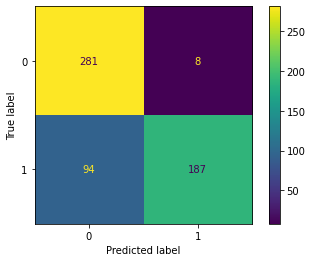

In [88]:
#####################################

predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

# SVM

In [89]:
score_svm = []
kernels = ['linear','poly','rbf','sigmoid']
C = [0.1,0.5,1,1.5,2]
for i in kernels:
    for j in C:
        for k in ['scale','auto']:
            svm = SVC(kernel = i , C=j ,gamma=k )
            score_svm.append([i,j,k, np.mean(cross_val_score(svm, x_train, y_train,scoring='recall',cv=5))])

score_svm = pd.DataFrame(score_svm)
score_svm = score_svm.sort_values(by=3, ascending=False)
score_svm.columns = ['kernel','C','gamma','accuracy']


In [90]:
score_svm[:5]

,kernel,C,gamma,accuracy
39,sigmoid,2.0,auto,0.757771
37,sigmoid,1.5,auto,0.756312
38,sigmoid,2.0,scale,0.751801
36,sigmoid,1.5,scale,0.748850
35,sigmoid,1.0,auto,0.745853


In [91]:
svm = SVC(kernel = 'linear',C=2 , gamma='auto')
svm.fit(x_train, y_train)

print('recall = {}'.format(recall_score(y_test, svm.predict(x_test))))
print('accuracy = {}'.format(accuracy_score(y_test , svm.predict(x_test))))


recall = 0.7117437722419929
accuracy = 0.8263157894736842


In [92]:
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       289
           1       0.92      0.71      0.80       281

    accuracy                           0.83       570
   macro avg       0.84      0.82      0.82       570
weighted avg       0.84      0.83      0.82       570



# RF

In [93]:
score_RF = []
for i in np.arange(5,35,5):
    for j in ['gini','entropy','log_loss']:
        for k in np.arange(5,35,5):
            for l in ['sqrt','log2']:
                RF = RandomForestClassifier(n_estimators = i , criterion=j , max_depth=k ,max_features=l)
                score_RF.append([i,j,k,l, np.mean(cross_val_score(RF, x_train, y_train,scoring='recall',cv=5))])

score_RF = pd.DataFrame(score_RF)
score_RF = score_RF.sort_values(by=4, ascending=False)



In [94]:
score_RF.columns = ['n_estimator','criterion','max_depth','max_features','accuracy']

In [95]:
score_RF

,n_estimator,criterion,max_depth,max_features,accuracy
102,15,log_loss,20,sqrt,0.983548
29,5,log_loss,15,log2,0.982056
201,30,entropy,25,log2,0.982056
149,25,gini,15,log2,0.982056
206,30,log_loss,10,sqrt,0.982045
...,...,...,...,...,...
84,15,entropy,5,sqrt,0.950679
156,25,entropy,5,sqrt,0.950600
12,5,entropy,5,sqrt,0.947683
61,10,log_loss,5,log2,0.947671


In [96]:
RF = RandomForestClassifier(n_estimators=15 , criterion='entropy' , max_depth= 15 , max_features = 'sqrt')
RF.fit(x_train, y_train)

print('recall = {}'.format(recall_score(y_test, RF.predict(x_test))))
print('accuracy = {}'.format(accuracy_score(y_test , RF.predict(x_test))))


recall = 0.7615658362989324
accuracy = 0.8771929824561403


In [97]:
print(classification_report(y_test, RF.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       289
           1       0.99      0.76      0.86       281

    accuracy                           0.88       570
   macro avg       0.90      0.88      0.88       570
weighted avg       0.90      0.88      0.88       570



# DT

In [98]:
score_DT = []

for i in ['gini','entropy','log_loss']:
    for j in ['best','random']:
        for k in np.arange(5,35,5):
            for l in ['sqrt','log2']:
                DT = DecisionTreeClassifier(criterion=i ,splitter=j, max_depth=k ,max_features=l)
                score_DT.append([i,j,k,l, np.mean(cross_val_score(DT, x_train, y_train,scoring='recall',cv=5))])

score_DT = pd.DataFrame(score_DT)
score_DT = score_DT.sort_values(by=4, ascending=False)



In [99]:
score_DT.columns = ['criterion','splitter','max_depth','max_features','accuracy']

In [100]:
score_DT

,criterion,splitter,max_depth,max_features,accuracy
8,gini,best,25,sqrt,0.973089
56,log_loss,best,25,sqrt,0.973089
26,entropy,best,10,sqrt,0.971586
27,entropy,best,10,log2,0.970093
55,log_loss,best,20,log2,0.968612
...,...,...,...,...,...
36,entropy,random,5,sqrt,0.657536
37,entropy,random,5,log2,0.651016
60,log_loss,random,5,sqrt,0.548524
12,gini,random,5,sqrt,0.470542


In [101]:
DT = DecisionTreeClassifier(criterion='log_loss' ,splitter='best', max_depth=20 ,max_features='sqrt').fit(x_train , y_train)

In [102]:
print(classification_report(y_test ,DT.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       289
           1       0.95      0.64      0.76       281

    accuracy                           0.81       570
   macro avg       0.84      0.80      0.80       570
weighted avg       0.84      0.81      0.80       570



# NB

In [103]:
score_NB = []

for i in np.logspace(0,-9, num=30):
    NB = GaussianNB(var_smoothing = i)
    score_NB.append([i, np.mean(cross_val_score(NB, x_train, y_train,scoring='recall',cv=5))])

score_NB = pd.DataFrame(score_NB)
score_NB = score_NB.sort_values(by=1, ascending=False)

score_NB.columns = ['var_smoothing','accuracy']

In [104]:
score_NB

,var_smoothing,accuracy
2,2.395027e-01,0.894019
0,1.000000e+00,0.891045
1,4.893901e-01,0.891045
3,1.172102e-01,0.889541
4,5.736153e-02,0.888037
23,7.278954e-08,0.885041
19,1.268961e-06,0.885041
20,6.210169e-07,0.885041
21,3.039195e-07,0.885041
22,1.487352e-07,0.885041


In [105]:
NB = GaussianNB(var_smoothing = 1.000000e+00).fit(x_train , y_train)
print(classification_report(y_test ,NB.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.15      0.25       289
           1       0.53      1.00      0.69       281

    accuracy                           0.57       570
   macro avg       0.77      0.57      0.47       570
weighted avg       0.77      0.57      0.47       570



# Result:
Random Forest (RF) has the best performance 